# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.multivariate_normal import MultivariateNormal


class Actor(nn.Module):
    """
    Actor is a policy network. Given state it generates an action.
    """

    def __init__(self, state_size, action_size, seed=42, hidden_size1=128, hidden_size2=128):
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.layer1 = nn.Linear(state_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, action_size)

    def forward(self, states):
        x = torch.tanh(self.layer1(states))
        x = torch.tanh(self.layer2(x))
        actions = torch.tanh(self.layer3(x)) 
        return actions

class Critic(nn.Module):
    """
    Critic network estimates value function for giver state and value.
    """

    def __init__(self, state_size, action_size, seed=42, hidden_size1=128, hidden_size2=128):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.bn = nn.BatchNorm1d(num_features=state_size)
        self.layer1 = nn.Linear(state_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1 + action_size, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, 1)

    def forward(self, states, actions):
        x = self.bn(states) 
        x = F.relu(self.layer1(x))
        x = torch.cat((x, actions), dim=1)
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [9]:
from collections import deque
import random
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class ReplayBuffer():
    """
    Memory buffer for saving trajectories
    """
    
    def __init__(self, buffer_size, batch_size):
        self.buffer = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.buffer_size = buffer_size
    
    def add(self, states, actions, rewards, next_states, dones):
        self.buffer.append((states, actions, rewards, next_states, dones))
        
    def sample(self):
        batch = random.sample(self.buffer, k=self.batch_size)
        f = lambda arr: torch.from_numpy(np.array(arr).astype(float)).float().to(device)
        states, actions, rewards, next_states, dones = map(f, zip(*batch))
        return states, actions, rewards, next_states, dones
    
    def is_enough(self):
        return len(self.buffer) > self.batch_size

# MADDPG Agent


In this project I implemented MADDPG algorith discussed in [this](https://arxiv.org/pdf/1706.02275.pdf) paper. basic idea of the algorithm that multiagent uses different actors and critics for each separate single agents while actor uses local observation of agent and critic uses merged actions and states for all agents as input. This trick allows cordination of multiple agents keepeng them independend during actions. Algorithm is provided below

#### Implementation details
It is also worth mentioning some details of my implementations:  
1) I used Gaussian noise at action time for exploration.  
2) Batch normalize states in critic network to keep actions and states in comparable scale.  
3) Used separate critics for each agent (shared critic can also be tried).  

#### Algorithm

<p><img align=left src="maddpg.png" width="600"/></p>



In [21]:
class DDPGAgent():
    """This class implemets single agent for MADDPG algorithm.
    
    """
    
    def __init__(self, action_size, state_size, num_agents, actor_lr, critic_lr, tau):
        self.tau = tau
        self.actor = Actor(state_size, action_size).to(device)
        self.target_actor = Actor(state_size, action_size).to(device)
        self.target_actor.load_state_dict(self.actor.state_dict())
        self.critic = Critic(state_size*num_agents, action_size*num_agents).to(device)
        self.target_critic = Critic(state_size*num_agents, action_size*num_agents).to(device)
        self.target_critic.load_state_dict(self.critic.state_dict())
        self.critic_optimizer = torch.optim.Adam(self.critic.parameters(), lr=critic_lr) 
        self.actor_optimizer = torch.optim.Adam(self.actor.parameters(), lr=actor_lr)
        
        
    def act(self, states, target): 
        if target:
            return self.target_actor.forward(states)
        else:
            return self.actor.forward(states)
    
    
    def update_actor(self, states, actions):
        self.actor_optimizer.zero_grad()
        loss = -self.critic.forward(states, actions).mean()
        loss.backward()
        self.actor_optimizer.step()
    
    
    def update_critic(self, states, actions, rewards, dones, next_states, next_actions, gamma):
        self.critic_optimizer.zero_grad()
        q_target = self.target_critic.forward(next_states, next_actions).detach()
        y = rewards + gamma*(1-dones)*q_target
        q = self.critic.forward(states, actions)
        loss = F.mse_loss(q, y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic.parameters(), 1)
        self.critic_optimizer.step()
    

    def update_target_networks(self):
        critic_params = zip(self.target_critic.parameters(), self.critic.parameters())
        for target_param, param in critic_params:
            updated_params = self.tau*param.data + (1-self.tau)*target_param.data
            target_param.data.copy_(updated_params)
            
        actor_params = zip(self.target_actor.parameters(), self.actor.parameters())
        for target_param, param in actor_params:
            updated_params = self.tau*param.data + (1-self.tau)*target_param.data
            target_param.data.copy_(updated_params)
            
    
                    

class MADDPGAgent():
    
    def __init__(self, action_size, state_size, num_agents, update_every=10, epochs=1,
                 buffer_size=1e5, batch_size=1000, actor_lr=1e-3, 
                 critic_lr=3e-4, gamma=0.99, tau=0.01, act_noise=0.1,
                 noise_decay=0.99995, min_noise=0.01, train_mode=True):
        """Initializes agent object
        
        Args: 
            action_size - size of action space
            state_size - size of state space 
            num_agents - number of agents 
            update_every - number of steps between updating networks 
            epochs - number of updates during network trading
            buffer_size - size of replay buffer
            batch_size - number of samples drawn from buffer fo training
            actor_lr - learning rate for actor optimizer
            critic_lr - learning rate for critic optimizer
            gamma - discount factor
            tau - soft update constant
            act_noise - start dispersion of noise for exploration
            noise_decay - how much noise is reduced at each step
            min_noise -  minimal dispersion of action noise
            train_mode - add noise and allow network updates when True
            
        """
        self.iter = 0
        self.gamma = gamma
        self.state_size = state_size
        self.action_size = action_size
        self.num_agents = num_agents
        self.update_every = update_every
        self.epochs = epochs
        self.agents = [DDPGAgent(action_size, state_size, num_agents, actor_lr, critic_lr, tau)
                       for _ in range(num_agents)]
        
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.replay_buffer = ReplayBuffer(buffer_size, batch_size)
        self.act_noise = act_noise
        self.noise_decay = noise_decay
        self.min_noise = min_noise
        self.mse_loss = torch.nn.MSELoss()
        self.train_mode = train_mode
    

    def act(self, states):
        """Takes actions given batch of states
        
        Args:
         states - numpy array of states for each agent
         
        """
        actions = []
        self.act_noise = max(self.noise_decay*self.act_noise, self.min_noise)
        
        for agent, state in zip(self.agents, states):
            state = torch.from_numpy(np.array([state])).float().to(device)
            agent.actor.eval()
            action = agent.act(state, target=False)
            agent.actor.train()
            if self.train_mode:
                action += self.act_noise*torch.randn(action.size()).to(device)
            actions.append(action.detach().cpu().numpy())
        return np.clip(np.vstack(actions), -1, 1)   
        

    def update(self, states, actions, rewards, next_states, dones):
        """Updates actor critic network
        
        Args:
         states - numpy array of states for each agent, row per agent
         actions - numpy array of actions for each agent
         rewards - rewards of taking actions given states
         next_states - state observed after action taken
         dones - flags of episode end
        """
        
        if not self.train_mode:
            return
        
        self.replay_buffer.add(states, actions, rewards, next_states, dones)
        
        if self.iter < self.update_every or not self.replay_buffer.is_enough():
            self.iter += 1
            return 
        
        self.iter=0
        for i, agent in enumerate(self.agents):
            for _ in range(self.epochs):
                self._update_agent(agent, i)
            
                    
    def _update_agent(self, agent, i):
        # Sample batch
        states, actions, rewards, next_states, dones = self.replay_buffer.sample()

        # Compute extended states and actions
        state_size_full = self.state_size*self.num_agents
        action_size_full = self.action_size*self.num_agents
        
        states_all = states.view(-1, state_size_full)
        actions_all = actions.view(-1, action_size_full)
        next_states_all = next_states.view(-1, state_size_full)
        rewards = rewards[:, i].view(-1, 1) 
        dones = dones[:, i].view(-1, 1)
        
        next_actions = self._act_all(next_states, True, -1)
        predicted_actions = self._act_all(states, False, i)

        # Update agent networks
        agent.update_critic(states_all, actions_all, rewards, dones, next_states_all, next_actions, self.gamma)
        agent.update_actor(states_all, predicted_actions)
        agent.update_target_networks()
        
            
    def _act_all(self, states, target, i):
        actions = []
        for j, agent in enumerate(self.agents):
            action = agent.act(states[:, j], target)
            if i==j:
                actions.append(action)
            else:
                actions.append(action.detach())
        return torch.cat(actions, dim=1)

In [22]:
import matplotlib.pyplot as plt
import time
%matplotlib inline

def run_episode(agent, episode, train_mode=True):
    """
    A helper method to run single episode and print metrics
    
    """
    agent.train_mode = train_mode
    env_info = env.reset(train_mode)[brain_name]        
    states = env_info.vector_observations                  
    scores = np.zeros(num_agents)
    while True:
        actions = agent.act(states) 
        env_info = env.step(actions)[brain_name]           
        next_states = env_info.vector_observations         
        rewards = env_info.rewards                         
        dones = env_info.local_done  
        agent.update(states, actions, rewards, next_states, dones)
        scores += env_info.rewards
        states = next_states
        if np.any(dones):   
            break
            
    return max(scores)

def run_episodes_and_display(agent, n_episodes=200, display_step=100):
    """
    Runs a series of episode and display agent's performance
    
    """
    
    scores = []
    times = deque(maxlen=display_step)
    for episode in range(1, n_episodes+1):
        
        start_time = time.time()
        score = run_episode(agent, episode, train_mode=True)
        times.append(time.time() - start_time)
        scores.append(score)
        
        avg_time = sum(times)/display_step
        avg_score = sum(scores[-display_step:])/display_step
        if avg_score > 0.5:
            print("Environment is solved in {} episodes! Average score last over 100 episodes {:.3f} > 0.5".format(episode, avg_score))
            break
                
        if episode%display_step==0:
            print('Average score episode {}: {:.3f}'.format(episode, avg_score))
            
            
    fig = plt.figure()
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Max Score')
    plt.xlabel('Episode #')
    plt.show()

Average score episode 100: 0.016
Average score episode 200: 0.023
Average score episode 300: 0.050
Average score episode 400: 0.074
Average score episode 500: 0.094
Average score episode 600: 0.102
Average score episode 700: 0.111
Average score episode 800: 0.124
Average score episode 900: 0.181
Environment is solved in 976 episodes! Average score last over 100 episodes 0.521 > 0.5


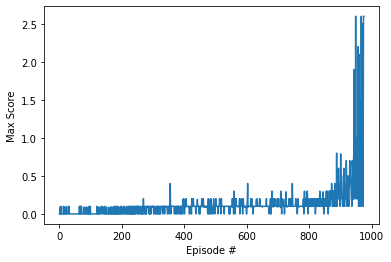

CPU times: user 28min 46s, sys: 1min 54s, total: 30min 40s
Wall time: 25min 32s


In [23]:
%%time

agent = MADDPGAgent(action_size, state_size, num_agents, 
                    update_every=10,
                    epochs=10,
                    buffer_size=int(1e5), 
                    batch_size=512, 
                    actor_lr=1e-4, 
                    critic_lr=1e-4,
                    gamma=0.99,
                    tau=0.01,
                    act_noise = 1,
                    noise_decay = 0.99995,
                    min_noise = 0.01)

run_episodes_and_display(agent, n_episodes = 1500)

In [26]:
run_episode(agent, 0, train_mode=False)

2.600000038743019

In [27]:
torch.save(agent.agents[0].critic.state_dict(), "agent1_critic.pt")
torch.save(agent.agents[0].actor.state_dict(), "agent1_actor.pt")
torch.save(agent.agents[1].critic.state_dict(), "agent2_critic.pt")
torch.save(agent.agents[1].actor.state_dict(), "agent2_actor.pt")

# Further work

As a future work i'd suggest following:  
1) We can observe that during play agents make a lot of unnaccessary move. We need to stabilize actions by adding some penalty for extra moves. This topic require further research.  
2) Add importance sampling to encourage faster learning.  
3) Solve environment with single agent algorithm like DDPG or PPO and compare performance.  
4) Try different tricks like initializing last layers of actor with zero or small values to encourage exploration on early stages of learning.